<a href="https://colab.research.google.com/github/richybu/gis_code/blob/main/assessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages:

In [3]:
import os
import numpy as np
import pandas as pd
# import geopandas as gpd               # causes error because of colab?
!pip install geopandas
import geopandas as gpd   
import matplotlib.cm as cm
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0 MB 6.5 MB/s 
     |████████████████████████████████| 6.3 MB 27.4 MB/s 
     |████████████████████████████████| 15.4 MB 53.1 MB/s 


In [4]:
import os       # used for interacting with operating system 
from requests import get
from urllib.parse import urlparse     # urllib handles URLs       # parsing is defined as the processing of a piece of python program and converting these codes into machine language

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.

  # i think this function means the file is downloaded to our comp so we dont have to download it from the internet each time
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL   # src is the source url we get the data from? 
    fn  = os.path.split(url.path)[-1] # Extract the filename as filename is the last item in te list i.e. -1
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")
        
        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
        
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [5]:
# we will need the boundaries of the london boroughs. It would also be helpful to see areas of water and park on our final map to make it easier to read,
# and also to make it clear why these areas do not have any listings

ddir  = os.path.join('data','geo') # destination directory (in case it is not found this directory is created)
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )         # each line makes a geopackage
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

print('Done.')

data/geo/Boroughs.gpkg not found, downloading!
	Done downloading...
data/geo/Water.gpkg not found, downloading!
	Done downloading...
data/geo/Greenspace.gpkg not found, downloading!
	Done downloading...
Done.


In [6]:
# check each is a geopackage dataframe
for gpkg in [boros,water,green]:
    print(isinstance(gpkg, gpd.GeoDataFrame))

True
True
True


In [7]:
# check the crs of each
for gpkg in [boros,water,green]:
    print(gpkg.crs)

epsg:27700
epsg:27700
epsg:27700


This will work well for our data - is a common crs for analysing GB data

In [8]:
# print each

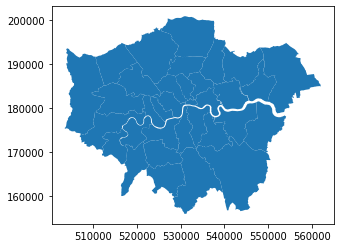

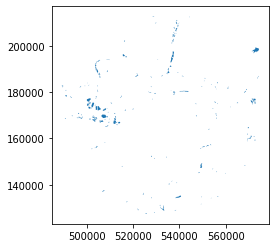

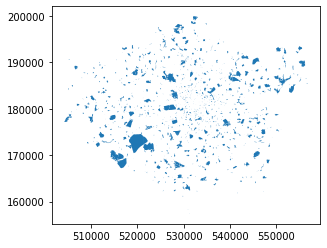

In [9]:
for gpkg in [boros,water,green]:    # a for loop to do a plot of each geopackage
    gpkg.plot()

FileNotFoundError: ignored

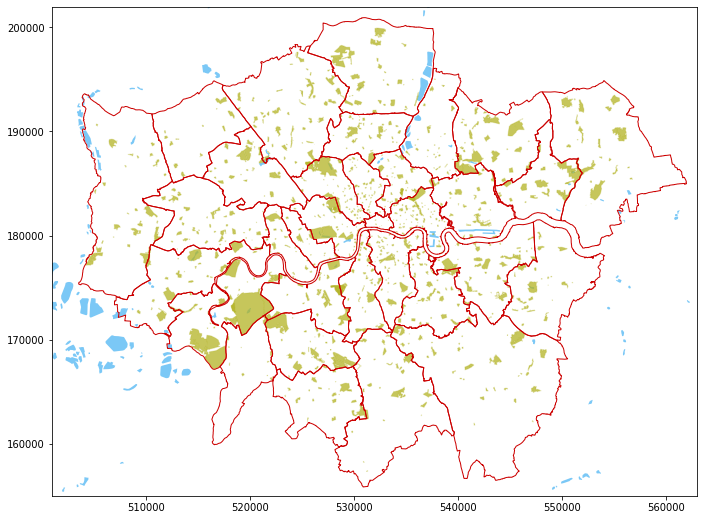

In [10]:
# Plot all three to the same axes and set colours to help show what the areas/lines are
fig, ax = plt.subplots(1,1, figsize=(12,9))

water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)                         # setting their axis to ax puts them on top of one another
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14, 0.75), ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 1), facecolor='none', linewidth=1, ax=ax)

# Set the limits
ax.set_xlim(501000,563000)            # the numbers are the easting and northing values i.e. metres from the equator. They just say how far west, east, north, and south we see on the map. i.e. we only want to see london, not the whole world
ax.set_ylim(155000,202000)

plt.savefig(os.path.join('img','Map-First_Pass.png'))       # saves the figure to img/Map-First_Pass.png

In [23]:
# now lets look at our point data
# this uses the London 10 October, 2021 listings.csv.gz file showing the 'Summary information and metrics for listings in London (good for visualisations).' available at http://insideairbnb.com/get-the-data.html

ddir  = os.path.join('data','raw') # destination directory                     
spath = 'https://github.com/richybu/fsds/' # source path

# pdf is pandas dataframe
pdf = pd.read_csv( cache_data(spath+'listings5.csv?raw=true', ddir),
    low_memory=False)



Found data/raw/listings5.csv locally!


In [24]:
# free up some memory
del(pdf)

In [29]:
#cols = ['id','latitude','longitude',          # selecting the columns that we want from the data so its fater
 #       'host_id','property_type','room_type',
 #       'accommodates','beds']
pdf  = pd.read_csv( cache_data(spath+'listings5.csv?raw=true', ddir),
        low_memory=False)                            # set pdf (pandas dataframe) to the data again but using only the cols we set above

print(f"pdf now contains {pdf.shape[0]} rows.")
pdf.info()

Found data/raw/listings5.csv locally!
pdf now contains 0 rows.
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Not Found  0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes


In [ ]:
# the downloaded gz file is too big, a rezipped file is too big. tried .zip a smaller file but i get the error, so could try gz reduced file using terminal?

In [ ]:
# select the columns we want to use to make things faster



In [ ]:
#change the data types of some columns?